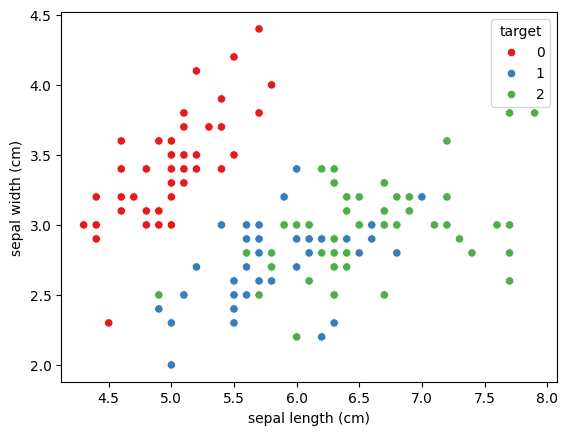

[2.93808505 0.9201649 ]


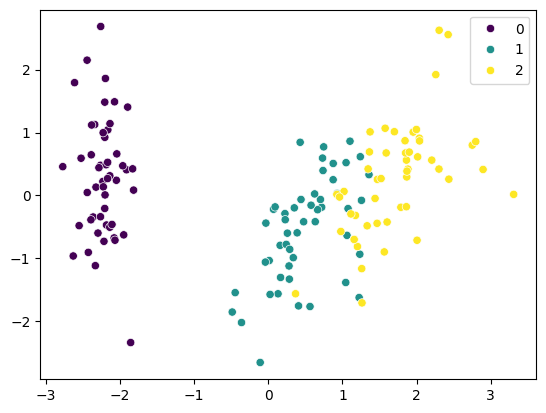

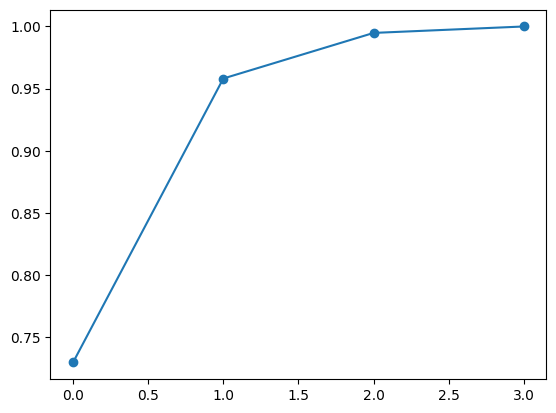

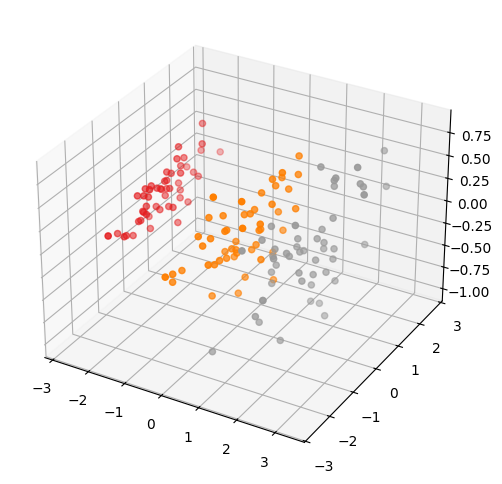

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

sns.scatterplot(x=df[feature_names[0]], y=df[feature_names[1]], hue=df['target'], palette='Set1')
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)
print(pca.explained_variance_)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='viridis')
plt.show()

pca_full = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.show()

pca = PCA(3)
X_scaled = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2], c=y, cmap='Set1')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

from mpl_toolkits.mplot3d import Axes3D

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

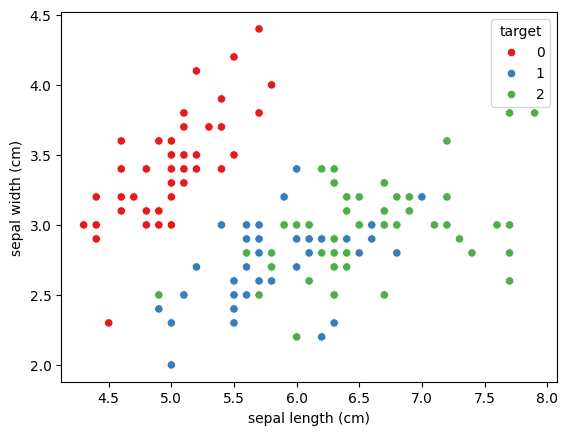

In [15]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
display(df.head())

sns.scatterplot(x=df[feature_names[0]], y=df[feature_names[1]], hue=df['target'], palette='Set1')

Explained variance Ratio(2 Components):  [0.72962445 0.22850762]


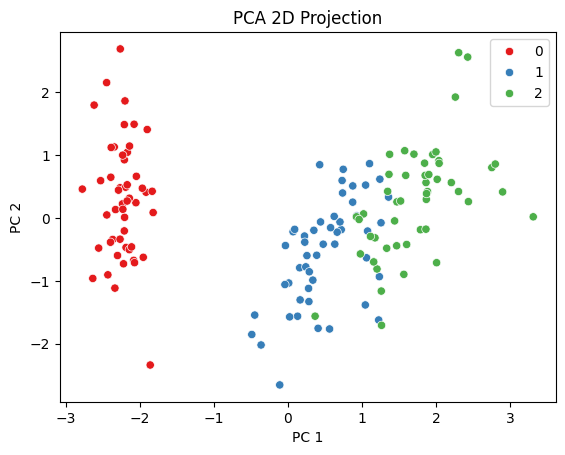

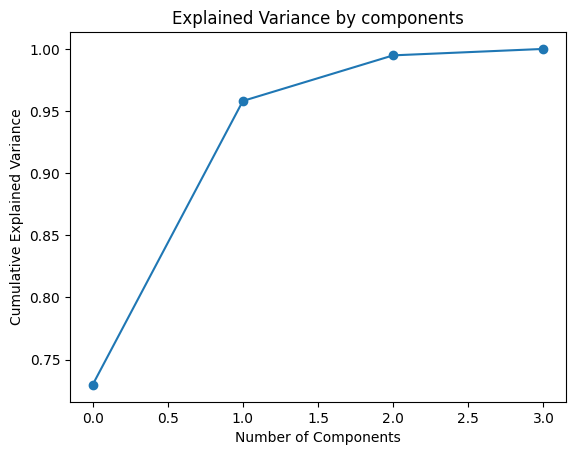

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)

print('Explained variance Ratio(2 Components): ', pca.explained_variance_ratio_)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1')
plt.title('PCA 2D Projection')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

pca_full = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title('Explained Variance by components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


Explained variance Ratio(3 Components):  [0.72962445 0.22850762 0.03668922]


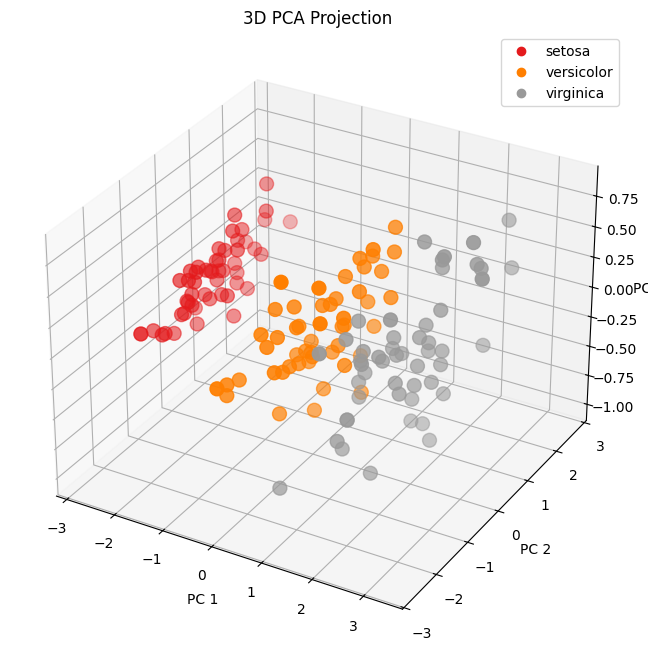

In [57]:
pca = PCA(3)
X_pca_3d = pca.fit_transform(X_scaled)

print('Explained variance Ratio(3 Components): ', pca.explained_variance_ratio_)

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2], c=y, cmap='Set1', s=100)
ax.set_title('3D PCA Projection')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.legend(handles=scatter.legend_elements()[0], labels=list(iris.target_names))
plt.show()
